In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
#from project_lib import Project
#project = Project(project_id='1ac38319-721a-4da3-9803-dfce8ad76eeb', project_access_token='p-7f8893397a036ac589bea6f8a3e8bb0ccc87c14d')
#pc = project.project_context

In [2]:
# @hidden_cell
CLIENT_ID = 'BPAX1A44J1YTPYCUOCZXBY41JTWTHB3H2M2ISKZTYCO5LQMA' # your Foursquare ID
CLIENT_SECRET = 'LSLUNFQNMUBH4KXC1S1O41RTPWP2J41IYQFMO44NU5GTJSER' # your Foursquare Secret
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Mis credenciales de Foursqueare:')

Mis credenciales de Foursqueare:


In [3]:
import numpy as np # librería para manejar datos vectorizados

import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import json # librería para manejar archivos JSON 

#!conda install -c conda-forge geopy --yes # retirar el comentario de esta línea si no ha completado el laboratorio de la API de FourSquare 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud

import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors
from pyecharts.charts import Pie
from pyecharts import options as opts
import folium # librería para graficar mapas 

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans

 #Libreria para ETL html
from bs4 import BeautifulSoup
import requests

print('Librerias importadas.')

Librerias importadas.


### Parametros
Ajuste en coordenadas de vecindarios de **Oakland**

In [4]:
#busqueda_geo='CA, USA'
busqueda_geo='Oakland, California, USA'

json_ajustes = '{ "Hegenberger":"1623, 70th Avenue", "Melrose Heights":"5201 Fairfax Ave", "Lockwood-Tevis":"Lockwood Gardens", "Coliseum Industrial (Neighborhood)":"8323 Baldwin St", "Wentworth Holland":"5301, Holland Street, Melrose", "Melrose":"1066 47th Ave", "Seminary":"1522;1524, 57th Avenue, Melrose", "Acorn (neighborhood)":"Acorn", "Bushrod Neighborhood":"Bushrod", "Caballo Hills":"6155, View Crest Drive", "City Center (Neighborhood)":"Oakland Marriott City Center", "Claremont Hills":"500, Gravatt Drive", "Columbia Gardens":"295 Wistar Rd", "Dogtown":"3260, Ettie Street", "Durant Manor":"10626 Beverly Ave", "Durant Manor":"10626 Beverly Ave", "Eastmont Hills":"7711 Sunkist Dr", "Embarcadero (Embarcadero Cove) Neighborhood":"Embarcadero", "Fitchburg":"1050 77th Ave", "Foothill Square (neighborhood)":"Foothill Square", "Foothill Square (neighborhood)":"Foothill Square", "Fruitvale Station (neighborhood)":"Fruitvale Station", "Highland Terrace":"2243, 19th Avenue, Highland Park", "Hiller Highlands":"34, Hiller Drive", "Iveywood":"1617, 102nd Avenue", "Ivy Hill":"1820, 5th Avenue, Merritt", "Laney College (neighborhood)":"Laney College", "Las Palmas":"10429 Voltaire Ave", "Leona Heights (neighborhood)":"Leona Heights", "North Stonehurst":"Creative Energy Foods, 9957, Medford Avenue, Arcadia Park", "Oak Knoll - Golf Links":"9120 Fontaine Street", "Oak Tree":"2515 E 16th St", "Rancho San Antonio (neighborhood)":"1815, Foothill Boulevard, San Antonio", "Sausal Creek (Neighborhood)":"Sausal Creek", "Skyline-Hillcrest Estates":"5405, Bacon Road", "Sobrante Park (Neighborhood)":"Sobrante Park", "South Kennedy Tract":"3600, Alameda Avenue", "South Stonehurst":"801 105th Ave", "St. Elizabeth":"Saint Elizabeth", "Toler Heights":"9796 Lawlor St"}'
json_ajustes = json.loads(json_ajustes)

Parametros de coordenadas de **Oakland, California**

In [5]:
address = 'Oakland, California, US'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lat_ = location.latitude
lon_ = location.longitude
print('Las coordenadas de Central East Oakland, California es {}, {}.'.format(lat_, lon_))

Las coordenadas de Central East Oakland, California es 37.8044557, -122.2713563.


Configuracion de colores y descripcion de categorias

In [6]:
abc_series=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
color_series = ['#802200','#B33000','#FF4500','#FAA327','#9ECB3C',
 '#6DBC49','#37B44E','#14ADCF','#209AC9','#1E91CA',
 '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#6A368B',
 '#B525B1','#D44C2D','#F57A34','#FA8F2F','#D99D21']

### Funciones
Transformacion de **HTML**

In [7]:
#obtener vecindarios de HTML request
def fn_df_vecindarios(contenedor_html,nombre_columna):
    columnas_html=[nombre_columna]
    df_html=pd.DataFrame(columns=columnas_html)
    for index,link in enumerate(contenedor_html.find_all('li')):
        vecindario_html=link.get_text()
        df_html=df_html.append({nombre_columna:vecindario_html}, ignore_index=True) 
    return(df_html)

Cargas **online** de datos geograficos

In [8]:
def fn_get_latitude(vecindario):
    geolocator = Nominatim(user_agent="foursquare_agent")
    w_ubicacion=(vecindario+', '+busqueda_geo)
    #print (w_ubicacion)
    location = geolocator.geocode(w_ubicacion)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        print('Datos no disponibles.. ',w_ubicacion)
        latitude = 0
        longitude = 0
    return latitude, longitude

In [9]:
#Obtener coordenadas de vecindarios
#   precargar ajustes Geograficos
def fn_obtener_coordenadas_vecindarios(df_data,columna_vecindario):
    columnas=[columna_vecindario,'Latitud','Longitud']
    df_vecindarios=pd.DataFrame(columns=columnas)
    for index, row in df_data.iterrows():
        try:
            vecindario=row[columna_vecindario]
            if (vecindario in json_ajustes)==True:
                w_vecindario=json_ajustes[vecindario]
            else:
                w_vecindario=vecindario
                
            lat,lon=fn_get_latitude(w_vecindario)
            df_vecindarios=df_vecindarios.append({columna_vecindario:vecindario,'Latitud':lat,'Longitud':lon}, ignore_index=True) 
        except Exception as e:
            print ("Error en carga de:",vecindario," detalle:",e)
    return(df_vecindarios)    

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # crear la URL de solicitud de API
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # solicitud GET
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # regresa solo información relevante de cada sitio cercano
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Vecindario', 
                  'Vecindario Latitude', 
                  'Vecindario Longitude', 
                  'Lugar', 
                  'Lugar Latitude', 
                  'Lugar Longitude', 
                  'Categoria Lugar']
    
    return(nearby_venues)

Cargas **offline** de datos geograficos

In [11]:
#Carga de data de vecindarios Oakland
def fn_offline_data_df_vecindarios_oakland(df_vecindarios_oakland):
    try:
        url_df_vecindarios_oakland='https://github.com/i3nriq/Ciencia-de-Datos-Aplicada---Curso-Capstone/blob/master/Data_oakland/df_vecindarios_oakland.csv?raw=true'
        import_df_vecindarios_oakland = pd.read_csv(url_df_vecindarios_oakland)
        import_df_vecindarios_oakland['Latitud'] = import_df_vecindarios_oakland['Latitud'].astype(object)
        import_df_vecindarios_oakland['Longitud'] = import_df_vecindarios_oakland['Longitud'].astype(object)
        print('Carga via Github..')
    except:
        import_df_vecindarios_oakland=fn_obtener_coordenadas_vecindarios(df_vecindarios_oakland,'Vecindario')
        print('Carga via API..')
        df_vecindarios_oakland_export=import_df_vecindarios_oakland[:]
        df_vecindarios_oakland_export.set_index("Vecindario", inplace = True)
        #project.save_data("df_vecindarios_oakland.csv", df_vecindarios_oakland_export.to_csv(float_format='%g'), overwrite=True)
    return(import_df_vecindarios_oakland)

In [12]:
#Carga de lugares de Oakland fuera de linea
def fn_offline_data_oakland_venues(df_vecindarios_oakland):
    try:
        url_oakland_venues='https://github.com/i3nriq/Ciencia-de-Datos-Aplicada---Curso-Capstone/blob/master/Data_oakland/oakland_venues.csv?raw=true'
        import_oakland_venues = pd.read_csv(url_oakland_venues)
        import_oakland_venues['Vecindario Latitude'] = import_oakland_venues['Vecindario Latitude'].astype(object)
        import_oakland_venues['Vecindario Longitude'] = import_oakland_venues['Vecindario Longitude'].astype(object)
        import_oakland_venues['Lugar Latitude'] = import_oakland_venues['Lugar Latitude'].astype(object)
        import_oakland_venues['Lugar Longitude'] = import_oakland_venues['Lugar Longitude'].astype(object)
        print('Carga via Github..')
    except Exception as e:
        import_oakland_venues= getNearbyVenues(names=df_vecindarios_oakland  ['Vecindario'],
                                   latitudes=df_vecindarios_oakland  ['Latitud'],
                                   longitudes=df_vecindarios_oakland  ['Longitud']
                                  )
        print('Carga via API..')
        oakland_venues_export=import_oakland_venues[:]
        oakland_venues_export.set_index("Vecindario", inplace = True)
        #project.save_data("oakland_venues.csv", oakland_venues_export.to_csv(float_format='%g'), overwrite=True)
    return(import_oakland_venues)

Analsis de lugares mas comunes

In [13]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [14]:
def get_unique(list1):
    x = np.array(list1)
    return(np.unique(x))

Analisis de DataFrame

In [15]:
def fn_descripcion_dataFrame(i_df_desc):
    print("Dimensiones dataframe: ",i_df_desc.shape)
    print("")
    print(i_df_desc.dtypes)

Graficos

In [16]:
#Grafico de Pie a 3 niveles
def fn_grafica_cluster(str_etiqueta_cluster,id_df_merge):
    #DATOS de anillos
    df_test=df_etiqueta=id_df_merge.loc[id_df_merge['Etiquetas de cluster'] == str_etiqueta_cluster-1, id_df_merge.columns[[0] + list(range(4, id_df_merge.shape[1]))]]
    
    # 3er Ring (outside)
    fig, ax = plt.subplots()
    ax.axis('equal')
    
    #DATA
    lst_frecuencia,lst_color,lst_caracter=fn_lst_cluster('2nd Lugar mas comun',df_test)
    mypie, _= ax.pie(lst_frecuencia, radius=1.3, labeldistance=0.85, labels=lst_caracter, colors=lst_color,
                                  textprops = dict(color ="w", family="sans-serif",fontweight="bold",size=9))
    plt.setp( mypie, width=0.6, edgecolor='white' ,alpha=0.75)
    #1er Anillo
    #DATA
    lst_frecuencia,lst_color,lst_caracter=fn_lst_cluster('1st Lugar mas comun',df_test)
    mypie2, _ = ax.pie(lst_frecuencia, radius=1.3-0.3, 
    labels=lst_caracter, labeldistance=0.75, colors=lst_color,
                                  textprops = dict(color ="w", family="sans-serif",fontweight="bold",size=9))
    plt.setp(mypie2, width=0.4, edgecolor='white')
    # 2do anillo
    #DATA
    lst_frecuencia,lst_color,lst_caracter=fn_lst_cluster('3rd Lugar mas comun',df_test)
    mypie3, _ = ax.pie(lst_frecuencia, radius=1.3+0.3, 
    labels=lst_caracter, labeldistance=0.925, colors=lst_color,
                                  textprops = dict(color ="w", family="sans-serif",fontweight="bold",size=9))
    plt.setp( mypie3, width=0.2, edgecolor='white' ,alpha=0.55)
    
    plt.margins(0,0)
    plt.text(0, 0, 'Etiqueta '+str(str_etiqueta_cluster), horizontalalignment='center',verticalalignment='center', alpha=0.5,fontsize=12,fontweight="bold")
    
    plt.legend(loc=(0.9, 0.1))
    handles, labels = ax.get_legend_handles_labels()
    lst_handles,lst_labes_cat= fn_lista_leyendas(get_unique(labels),df_categorias_config)
    ax.legend(lst_handles, lst_labes_cat, loc=(1.2, 0.1))

    plt.show()
    #print(df_test['Vecindario'])

In [17]:
#Segmentacion de cluser en 1,2 y 3 lugar mas comun
def fn_lst_cluster(str_etiqueta,df_etiqueta):
    df_etiqueta=df_etiqueta.groupby([str_etiqueta])[["Vecindario"]].count()
    df_etiqueta = df_etiqueta['Vecindario'].to_frame(name = 'Cantidad').reset_index()
    #Convertir a porcentaje
    df_etiqueta=df_etiqueta.groupby([str_etiqueta]).agg({"Cantidad" : "sum"})[["Cantidad"]].apply(lambda x: 100*x/x.sum()).sort_values(by="Cantidad", ascending=False)
    df_etiqueta=df_etiqueta.reset_index()
    #Atribuciones extras
    df_etiqueta=(pd.merge(df_etiqueta, df_categorias_config, left_on=str_etiqueta, right_on='Categoria Lugar'))
    df_etiqueta=df_etiqueta.drop([str_etiqueta,'Cantidad_y'], axis=1)
    return  df_etiqueta['Cantidad_x'],df_etiqueta['Color'],df_etiqueta['Caracter']

In [18]:
#Obtener las lyendas de forma dinamica
def fn_lista_leyendas(i_labels,i_df_categorias):
    lst_color_wedge=[]
    lst_descripcion_wedge=[]
    for caracter in i_labels:
        sd=str(i_df_categorias[i_df_categorias['Caracter']==caracter]["Color"].values)
        sd = sd.replace("[", "").replace("]", "").replace("'", "")
        wedge_caracter = mpl.patches.Wedge((0,0), 1, -10, 10,color=sd   )
        lst_color_wedge.append(wedge_caracter)
        sd=str(i_df_categorias[i_df_categorias['Caracter']==caracter]["Descripcion"].values).replace("[", "").replace("]", "").replace("'", "")
        lst_descripcion_wedge.append(sd)   
    return lst_color_wedge,lst_descripcion_wedge

# Extraccion de datos

In [19]:
#Extraccion de Vecindario en Oakland
url_wiki="https://localwiki.org/oakland/Neighborhoods"
response = requests.get(url_wiki)
bs = BeautifulSoup(response.text, 'html.parser')
lst_vecindarios_rqst=bs.find(id="pagetagset")

Obtener el listado de vecindarios de Oakland en base al contenido HTML.

In [20]:
df_vecindarios_oakland=fn_df_vecindarios(lst_vecindarios_rqst,'Vecindario')

Importar coordenadas de los vecindarios de **Oakland**

In [21]:
df_vecindarios_oakland=fn_offline_data_df_vecindarios_oakland(df_vecindarios_oakland)

Carga via Github..


In [22]:
#Filtrado de vecindarios que no cuentan con latitud y longitud
df_vecindarios_oakland = df_vecindarios_oakland[df_vecindarios_oakland['Latitud'] != 0]

fn_descripcion_dataFrame(df_vecindarios_oakland)
df_vecindarios_oakland.head()

Dimensiones dataframe:  (142, 3)

Vecindario    object
Latitud       object
Longitud      object
dtype: object


,Vecindario,Latitud,Longitud
1,Acorn (neighborhood),37.805371,-122.285892
2,Adams Point,37.810403,-122.255903
3,Allendale,37.789314,-122.203817
4,Arroyo Viejo,37.761184,-122.178399
5,Bartlett,37.789009,-122.210454


Obtener los lugares de los Vecindarios de **Oakland**

In [23]:
oakland_venues = fn_offline_data_oakland_venues(df_vecindarios_oakland)

Carga via Github..


In [24]:
fn_descripcion_dataFrame(oakland_venues)
oakland_venues.head()

Dimensiones dataframe:  (2462, 7)

Vecindario              object
Vecindario Latitude     object
Vecindario Longitude    object
Lugar                   object
Lugar Latitude          object
Lugar Longitude         object
Categoria Lugar         object
dtype: object


,Vecindario,Vecindario Latitude,Vecindario Longitude,Lugar,Lugar Latitude,Lugar Longitude,Categoria Lugar
0,Acorn (neighborhood),37.8054,-122.286,Full Out Studios,37.804,-122.29,Dance Studio
1,Acorn (neighborhood),37.8054,-122.286,Orbit Coffee & Doughnuts,37.8041,-122.29,Donut Shop
2,Acorn (neighborhood),37.8054,-122.286,Planet Fitness,37.8035,-122.281,Gym / Fitness Center
3,Acorn (neighborhood),37.8054,-122.286,7th West,37.8041,-122.291,Bar
4,Acorn (neighborhood),37.8054,-122.286,Lowell Park,37.8083,-122.285,Park


# Analisis de datos

In [25]:
df_resumen_categorias = pd.DataFrame(data=oakland_venues['Categoria Lugar'].unique(), columns=["Categoria"]).sort_values(by=['Categoria']).reset_index(drop=True)
fn_descripcion_dataFrame(df_resumen_categorias)
df_resumen_categorias.head()

Dimensiones dataframe:  (277, 1)

Categoria    object
dtype: object


,Categoria
0,ATM
1,Adult Boutique
2,Afghan Restaurant
3,African Restaurant
4,American Restaurant


In [26]:
df_test=oakland_venues.groupby('Categoria Lugar')[["Vecindario"]].count()
df_test.sort_values(by=['Vecindario'], ascending=False)

,Vecindario
Categoria Lugar,
Coffee Shop,97
Mexican Restaurant,88
Café,70
Pizza Place,70
Liquor Store,65
Chinese Restaurant,61
Park,61
Grocery Store,56
Bar,54


Analizar competidores directos e indirectos de una **Panaderia**

In [27]:
lst_categorias =['Café','Bakery','Sandwich Place','Burger Joint','Convenience Store','Donut Shop','Market','Latin American Restaurant','Bagel Shop','Supermarket','Cupcake Shop','Pet Café','Street Food Gathering','Food Truck','American Restaurant','Grocery Store']
cnt_categorias=len(lst_categorias)

#Analizar lugares panaderia y productos sustitutos
okland_lugares = oakland_venues[oakland_venues['Categoria Lugar'].isin(lst_categorias)]

print('Tenemos {} categorias unicas.'.format(len(okland_lugares['Categoria Lugar'].unique())))
df_f=okland_lugares.groupby('Categoria Lugar')[["Vecindario"]].count().sort_values(by=['Vecindario'], ascending=False)
df_f

Tenemos 16 categorias unicas.


,Vecindario
Categoria Lugar,
Café,70
Grocery Store,56
Food Truck,49
Bakery,43
Sandwich Place,38
American Restaurant,34
Burger Joint,29
Convenience Store,25
Donut Shop,15


In [28]:
fn_descripcion_dataFrame(okland_lugares)
okland_lugares.head()

Dimensiones dataframe:  (410, 7)

Vecindario              object
Vecindario Latitude     object
Vecindario Longitude    object
Lugar                   object
Lugar Latitude          object
Lugar Longitude         object
Categoria Lugar         object
dtype: object


,Vecindario,Vecindario Latitude,Vecindario Longitude,Lugar,Lugar Latitude,Lugar Longitude,Categoria Lugar
1,Acorn (neighborhood),37.8054,-122.286,Orbit Coffee & Doughnuts,37.8041,-122.29,Donut Shop
15,Acorn (neighborhood),37.8054,-122.286,Donuts & Burgers,37.8041,-122.291,Donut Shop
22,Adams Point,37.8104,-122.256,Cholita Linda,37.8132,-122.259,Food Truck
28,Adams Point,37.8104,-122.256,Whole Foods Market,37.8126,-122.261,Grocery Store
31,Adams Point,37.8104,-122.256,Ahn's Quarter Pound Burger,37.8086,-122.253,Burger Joint


### Vecindarios con cantidad de lugares a analizar

#### Frecuencia de categorias por vecindario

In [29]:
df_resumen_analisis_top=okland_lugares[:]

In [30]:
resumen_categorias_top=df_resumen_analisis_top.groupby(['Vecindario','Categoria Lugar'])[["Vecindario"]].count()
resumen_categorias_top.rename(columns={"Vecindario":"Cantidad"},inplace=True)
resumen_categorias_top.reset_index(drop=False,inplace=True)

df_lugares_agrupados=resumen_categorias_top.groupby(['Vecindario'])[["Vecindario"]].count()
df_lugares_agrupados.rename(columns={"Vecindario":"Cantidad"},inplace=True)
df_lugares_agrupados.sort_values(by=['Cantidad'],ascending=False,inplace=True)

df_lugares_agrupados.reset_index(drop=False,inplace=True)
df_lugares_agrupados.sort_values(by=['Vecindario'],ascending=False,inplace=True)


df_TOP=df_lugares_agrupados.groupby(['Cantidad'])[["Vecindario"]].count()
df_TOP.sort_values(by=['Vecindario'],ascending=False,inplace=True)


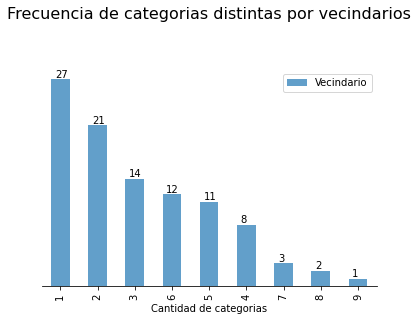

In [31]:
ax=df_TOP.plot(kind="bar", stacked=False, alpha=0.7)

ax.set_title('Frecuencia de categorias distintas por vecindarios',fontsize=16, pad=50)
ax.set_ylabel('Vecindarios')
ax.set_xlabel('Cantidad de categorias')
for p in ax.patches:
    ax.annotate(("{0}".format(p.get_height())), (p.get_x() + 0.10 , p.get_height() +0.25),fontsize=10)

ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

#### Eliminar vecindarios que no contienen 3 categorias de lugares

Analisis para determinar vecindarios que aportan informacion, eliminando los que no podran aportar mas menos de 3 categorias para el modelo.

In [32]:
df_lugares_original=df_lugares_agrupados[:]

In [33]:
#Vecindarios eliminados
df_vecindarios_eliminados=df_lugares_agrupados[df_lugares_agrupados['Cantidad']<3]
#Vecindarios con 3 o mas vecindarios
df_lugares_agrupados=df_lugares_agrupados[df_lugares_agrupados['Cantidad']>=3]

In [34]:
df_vecindarios_eliminados

,Vecindario,Cantidad
53,Village Bottoms,2
77,Upper Rockridge,1
75,Trestle Glen,1
72,Toler Heights,1
51,The Laurel District,2
81,South Kennedy Tract,1
76,Sobrante Park (Neighborhood),1
83,Sheffield Village,1
84,Sequoyah,1
85,Seminary,1


In [35]:
df_3 = okland_lugares[okland_lugares['Vecindario'].isin(df_lugares_agrupados['Vecindario'])]
df_m3 = okland_lugares[okland_lugares['Vecindario'].isin(df_vecindarios_eliminados['Vecindario'])]
print ("{1} Vecindarios de Oakland:                                         , representando {0} lugares.".format(len(okland_lugares),len(pd.unique(okland_lugares['Vecindario']))))
print ("{1} Vecindarios descartados por no contar con minimo 3 categorias:  , representando {0} lugares.".format(len(df_m3),len(pd.unique(df_m3['Vecindario']))))
print ("{1} Vecindarios de Oakland a analizar:                              , representando {0} lugares.".format(len(df_3),len(pd.unique(df_3['Vecindario']))))
#Se analizaran lso vecindarios unicamente que proporcionen 3 o mas categorias de establecimientos
okland_lugares=df_3

99 Vecindarios de Oakland:                                         , representando 410 lugares.
48 Vecindarios descartados por no contar con minimo 3 categorias:  , representando 73 lugares.
51 Vecindarios de Oakland a analizar:                              , representando 337 lugares.


### Vecindarios a analizar de Oakland, California

In [36]:
#Vecindarios a analizar
df_oakland_vecindario_resumen=okland_lugares.groupby(['Vecindario','Vecindario Latitude','Vecindario Longitude'])
df_oakland_vecindario_resumen=df_oakland_vecindario_resumen[['Vecindario','Vecindario Latitude','Vecindario Longitude']].first().reset_index(drop=True)

fn_descripcion_dataFrame(df_oakland_vecindario_resumen)
df_oakland_vecindario_resumen.head()

Dimensiones dataframe:  (51, 3)

Vecindario               object
Vecindario Latitude     float64
Vecindario Longitude    float64
dtype: object


,Vecindario,Vecindario Latitude,Vecindario Longitude
0,Adams Point,37.8104,-122.256
1,Chinatown,37.7999,-122.270
2,City Center (Neighborhood),37.8022,-122.273
3,Civic Center,37.8006,-122.265
4,Cleveland Heights,37.8045,-122.245


In [37]:
map_clusters = folium.Map(location=[lat_, lon_], zoom_start=12)

# establecer el esquema de
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi in zip(df_oakland_vecindario_resumen  ['Vecindario Latitude'], df_oakland_vecindario_resumen  ['Vecindario Longitude'], df_oakland_vecindario_resumen  ['Vecindario']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_color=rainbow[5-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Categorias a analizar de Oakland, California

### Parametros
Tabla de colores

In [38]:
df_f=okland_lugares.groupby('Categoria Lugar')[["Vecindario"]].count().sort_values(by=['Vecindario'], ascending=False)
d2 = df_f['Vecindario'].to_frame(name = 'Cantidad').reset_index()
d2=d2.sort_values(by=['Cantidad'], ascending=False)


In [39]:
df_categorias_config = df_f['Vecindario'].to_frame(name = 'Cantidad').reset_index()
df_categorias_config=df_categorias_config.sort_values(by=['Cantidad'], ascending=False)
df_categorias_config.reset_index(inplace=True,drop=True)
#integrar color y caracter a tabla de configuraciones
df_categorias_config=pd.merge(df_categorias_config, ( pd.DataFrame (color_series, columns = ['Color'])), left_index=True, right_index=True)
df_categorias_config=pd.merge(df_categorias_config, ( pd.DataFrame (abc_series, columns = ['Caracter'])), left_index=True, right_index=True)
df_categorias_config["Descripcion"]=df_categorias_config["Caracter"]+' - '+df_categorias_config["Categoria Lugar"]
df_categorias_config

,Categoria Lugar,Cantidad,Color,Caracter,Descripcion
0,Café,61,#802200,A,A - Café
1,Grocery Store,45,#B33000,B,B - Grocery Store
2,Bakery,43,#FF4500,C,C - Bakery
3,Food Truck,35,#FAA327,D,D - Food Truck
4,Sandwich Place,31,#9ECB3C,E,E - Sandwich Place
5,American Restaurant,27,#6DBC49,F,F - American Restaurant
6,Burger Joint,23,#37B44E,G,G - Burger Joint
7,Convenience Store,14,#14ADCF,H,H - Convenience Store
8,Donut Shop,12,#209AC9,I,I - Donut Shop
9,Bagel Shop,9,#1E91CA,J,J - Bagel Shop


### Graficos
Frecuencia de establecimientos por categoria a analizar **Oakland**

In [40]:
c = df_categorias_config['Categoria Lugar'].values.tolist()
d = df_categorias_config['Cantidad'].values.tolist()
color_series = df_categorias_config['Color'].values.tolist()
# crear el color_series para el rosechart

rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
# establecer el color
rosechart.set_colors(color_series)
# agregar los datos al gráfico de rosas
rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  # 20% radio interior, 95% radio exterior
        center=["30%", "60%"],   # centro de la carta
        rosetype="area")
# establecer las opciones globales para el gráfico
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='Categorias Oakland, California',subtitle="IBM - DataScience 2022, Enrique Magnani"),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())
# Asignaro las opciones de las series
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=9,formatter="{b}: {c}", font_style="sans-serif",font_weight="bold", font_family="Century"),)
rosechart.render_notebook()

### Visualizar lugares por categoria

In [41]:
map_clusters = folium.Map(location=[lat_, lon_], zoom_start=12)

# establecer el esquema de color para las agrupaciones
x = np.arange(cnt_categorias)
ys = [i + x + (i*x)**2 for i in range(cnt_categorias)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi,lugar in zip(okland_lugares  ['Lugar Latitude'], okland_lugares  ['Lugar Longitude'], okland_lugares  ['Categoria Lugar'], okland_lugares  ['Lugar']):
    label = folium.Popup(str(poi)+' - '+lugar, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=str(df_categorias_config[df_categorias_config['Categoria Lugar']==poi]["Color"].values),
        fill=True,
        fill_color=rainbow[lst_categorias.index(poi)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analisis Onehot

In [42]:
# codificación
oakland_onehot = pd.get_dummies(okland_lugares[['Categoria Lugar']], prefix="", prefix_sep="")

# añadir la columna de barrio de regreso al dataframe
oakland_onehot['Vecindario'] = okland_lugares['Vecindario'] 

# mover la columna de barrio a la primer columna
fixed_columns = [oakland_onehot.columns[-1]] + list(oakland_onehot.columns[:-1])
oakland_onehot = oakland_onehot[fixed_columns]

oakland_onehot.head()

,Vecindario,American Restaurant,Bagel Shop,Bakery,Burger Joint,Café,Convenience Store,Cupcake Shop,Donut Shop,Food Truck,Grocery Store,Latin American Restaurant,Market,Pet Café,Sandwich Place,Street Food Gathering,Supermarket
22,Adams Point,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
28,Adams Point,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31,Adams Point,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
44,Adams Point,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
48,Adams Point,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
oakland_grouped = oakland_onehot.groupby('Vecindario').mean().reset_index()
print ("Oakland agrupado - analisis",oakland_onehot.shape)
oakland_grouped.head()

Oakland agrupado - analisis (337, 17)


,Vecindario,American Restaurant,Bagel Shop,Bakery,Burger Joint,Café,Convenience Store,Cupcake Shop,Donut Shop,Food Truck,Grocery Store,Latin American Restaurant,Market,Pet Café,Sandwich Place,Street Food Gathering,Supermarket
0,Adams Point,0.0,0.0,0.000000,0.2,0.000000,0.20,0.0,0.000000,0.200000,0.400000,0.0,0.0,0.0,0.0,0.000000,0.0
1,Chinatown,0.0,0.0,0.500000,0.0,0.250000,0.00,0.0,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0
2,City Center (Neighborhood),0.0,0.0,0.500000,0.0,0.250000,0.00,0.0,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0
3,Civic Center,0.0,0.0,0.117647,0.0,0.411765,0.00,0.0,0.058824,0.235294,0.117647,0.0,0.0,0.0,0.0,0.058824,0.0
4,Cleveland Heights,0.0,0.0,0.000000,0.0,0.250000,0.25,0.0,0.000000,0.250000,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0


### Ponderar de forma descendente

In [44]:
num_top_venues = 3
indicators = ['st', 'nd', 'rd']

# crear las columnas acorde al numero de sitios populares
columns = ['Vecindario']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Lugar mas comun'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Lugar mas comun'.format(ind+1))

# crear un nuevo dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Vecindario'] = oakland_grouped['Vecindario']

for ind in np.arange(oakland_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(oakland_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Vecindario,1st Lugar mas comun,2nd Lugar mas comun,3rd Lugar mas comun
0,Adams Point,Grocery Store,Burger Joint,Convenience Store
1,Chinatown,Bakery,Café,Grocery Store
2,City Center (Neighborhood),Bakery,Café,Grocery Store
3,Civic Center,Café,Food Truck,Bakery
4,Cleveland Heights,Café,Convenience Store,Food Truck


### Modelo K-Means

In [45]:
# establecer el número de agrupaciones
kclusters = 5

oakland_grouped_clustering = oakland_grouped.drop('Vecindario', 1)

# ejecutar k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(oakland_grouped_clustering)

# revisar las etiquetas de las agrupaciones generadas para cada fila del dataframe
kmeans.labels_[0:3] 

array([3, 0, 0])

In [46]:
# añadir etiquetas
neighborhoods_venues_sorted.insert(0, 'Etiquetas de cluster', kmeans.labels_)
toronto_merged = df_vecindarios_oakland

# juntar manhattan_grouped con manhattan_data 
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Vecindario'), on='Vecindario')

In [47]:
#ELiminar vecindarios sin analizar 
toronto_merged = toronto_merged[toronto_merged['Etiquetas de cluster'].notna()]
#Convertir etiqueta cluster
toronto_merged['Etiquetas de cluster'] = toronto_merged['Etiquetas de cluster'].astype(int)
toronto_merged.head() # revisar las ultimas columnas

,Vecindario,Latitud,Longitud,Etiquetas de cluster,1st Lugar mas comun,2nd Lugar mas comun,3rd Lugar mas comun
2,Adams Point,37.810403,-122.255903,3,Grocery Store,Burger Joint,Convenience Store
14,Chinatown,37.79993,-122.270239,0,Bakery,Café,Grocery Store
15,City Center (Neighborhood),37.802165,-122.273128,0,Bakery,Café,Grocery Store
16,Civic Center,37.800584,-122.264735,4,Café,Food Truck,Bakery
19,Cleveland Heights,37.804546,-122.245325,1,Café,Convenience Store,Food Truck


### Parametros
Tabla de colores para Mapa de Clusters

In [48]:
# establecer el esquema de color para las agrupaciones
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

colores_diccionario = {}
for index, value in enumerate(rainbow):
    colores_diccionario[index+1] = value   

colores_diccionario

{1: '#8000ff', 2: '#00b5eb', 3: '#80ffb4', 4: '#ffb360', 5: '#ff0000'}

# Mapa de Clusters Oakland California

Distribucion de frecuencias

In [49]:
resumen_cluster=toronto_merged.groupby('Etiquetas de cluster')[["Vecindario"]].count()
resumen_cluster = resumen_cluster['Vecindario'].to_frame(name = 'Cantidad').reset_index()
resumen_cluster=resumen_cluster.sort_values(by=['Cantidad'], ascending=False) 
resumen_cluster['Etiquetas de cluster']=resumen_cluster['Etiquetas de cluster']+1
resumen_cluster['index']=resumen_cluster['Etiquetas de cluster']
resumen_cluster.set_index("index",inplace=True)

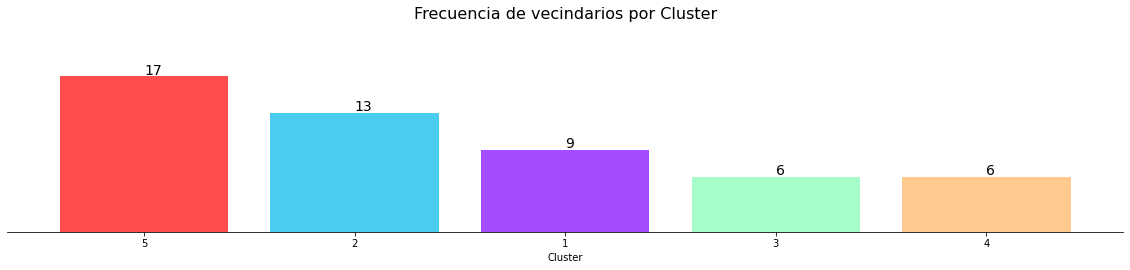

In [50]:

ax =resumen_cluster['Cantidad'].plot(kind='bar' , stacked=False, figsize=(20, 3), rot=0,width=0.8, alpha=0.7,color=resumen_cluster['Etiquetas de cluster'].replace(colores_diccionario))
 
ax.set_title('Frecuencia de vecindarios por Cluster',fontsize=16, pad=50)
ax.set_ylabel('Vecindarios')
ax.set_xlabel('Cluster')

for p in ax.patches:
    ax.annotate(("{0}".format(p.get_height())), (p.get_x() + 0.40 , p.get_height() +0.25),fontsize=14)

ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


Mapa de vecindarios

In [51]:
# crear mapa
map_clusters = folium.Map(location=[lat_, lon_], zoom_start=12)

# añadir marcadores al mapa
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitud'], toronto_merged['Longitud'], toronto_merged['Vecindario'], toronto_merged['Etiquetas de cluster']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

## Detalle de Clusters
### Etiqueta 1

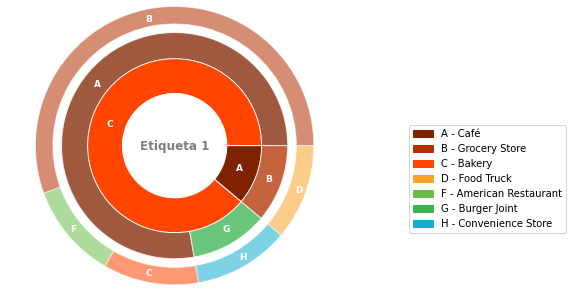

In [52]:
fn_grafica_cluster(1,toronto_merged)

In [53]:
toronto_merged.loc[toronto_merged['Etiquetas de cluster'] == 0, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Vecindario,1st Lugar mas comun,2nd Lugar mas comun,3rd Lugar mas comun
14,Chinatown,Bakery,Café,Grocery Store
15,City Center (Neighborhood),Bakery,Café,Grocery Store
52,Grand Lake,Bakery,Café,American Restaurant
71,Jingletown,Bakery,Café,Convenience Store
86,Lynn,Bakery,Café,Grocery Store
110,Old Oakland,Bakery,Café,Grocery Store
125,Rockridge,Café,Grocery Store,Bakery
141,Temescal,Bakery,Café,Food Truck
161,Woodminster,Bakery,Burger Joint,Grocery Store


### Etiqueta 2

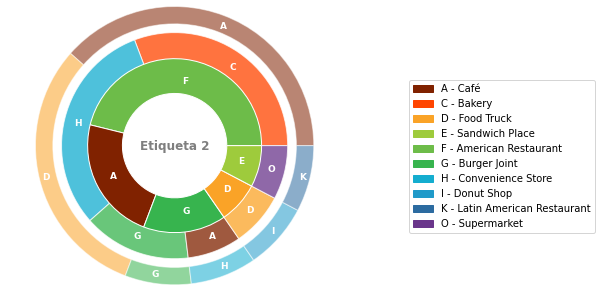

In [54]:
fn_grafica_cluster(2,toronto_merged)

In [55]:
toronto_merged.loc[toronto_merged['Etiquetas de cluster'] == 1, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Vecindario,1st Lugar mas comun,2nd Lugar mas comun,3rd Lugar mas comun
19,Cleveland Heights,Café,Convenience Store,Food Truck
22,Coliseum Industrial (Neighborhood),American Restaurant,Burger Joint,Convenience Store
45,Fruitvale Station (neighborhood),Burger Joint,Café,Food Truck
54,Haddon Hill,Café,Convenience Store,Food Truck
67,Ivy Hill,Café,Convenience Store,Donut Shop
68,Jack London Square,American Restaurant,Bakery,Café
73,Koreatown Northgate,American Restaurant,Bakery,Café
93,Merritt,Sandwich Place,Supermarket,Café
102,Northgate,American Restaurant,Bakery,Café
103,North Oakland,Burger Joint,Convenience Store,Food Truck


### Etiqueta 3

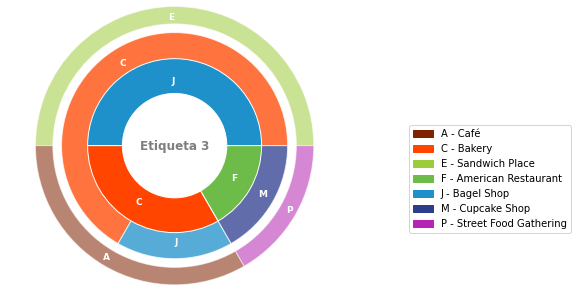

In [56]:
fn_grafica_cluster(3,toronto_merged)

In [57]:
toronto_merged.loc[toronto_merged['Etiquetas de cluster'] == 2, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Vecindario,1st Lugar mas comun,2nd Lugar mas comun,3rd Lugar mas comun
30,Downtown Oakland,Bakery,Bagel Shop,Café
74,Lakeshore,American Restaurant,Bakery,Café
94,Mills College,Bakery,Cupcake Shop,Sandwich Place
96,Montclair,Bagel Shop,Bakery,Sandwich Place
97,Montclair Village,Bagel Shop,Bakery,Sandwich Place
98,Mosswood,Bagel Shop,Bakery,Street Food Gathering


### Etiqueta 4

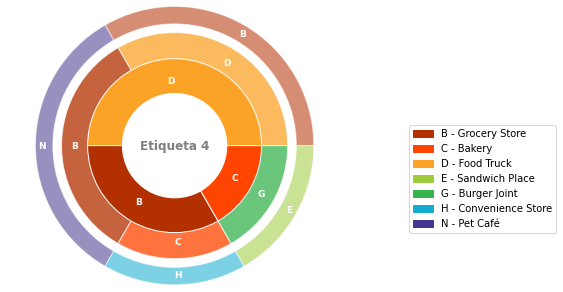

In [58]:
fn_grafica_cluster(4,toronto_merged)

In [59]:
toronto_merged.loc[toronto_merged['Etiquetas de cluster'] == 3, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Vecindario,1st Lugar mas comun,2nd Lugar mas comun,3rd Lugar mas comun
2,Adams Point,Grocery Store,Burger Joint,Convenience Store
48,Glen Echo,Food Truck,Grocery Store,Pet Café
58,Hawthorne,Food Truck,Grocery Store,Pet Café
109,Oak Tree,Food Truck,Bakery,Grocery Store
118,Pill Hill,Bakery,Food Truck,Grocery Store
122,Rancho San Antonio (neighborhood),Grocery Store,Food Truck,Sandwich Place


### Etiqueta 5

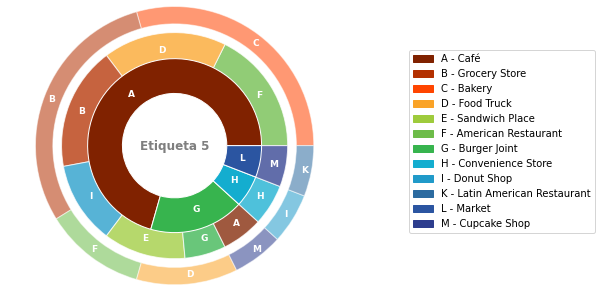

In [60]:
fn_grafica_cluster(5,toronto_merged)

In [61]:
toronto_merged.loc[toronto_merged['Etiquetas de cluster'] == 4, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Vecindario,1st Lugar mas comun,2nd Lugar mas comun,3rd Lugar mas comun
16,Civic Center,Café,Food Truck,Bakery
28,Dimond District,Café,Grocery Store,Bakery
41,Foothill Square (neighborhood),Burger Joint,Convenience Store,Grocery Store
43,Fremont,Café,Donut Shop,Food Truck
75,Lakeside,Café,American Restaurant,Cupcake Shop
83,Lower Dimond,Café,Grocery Store,Bakery
112,Paradise Park,Café,Cupcake Shop,Donut Shop
115,Peralta Hacienda,Market,Burger Joint,Grocery Store
116,Piedmont Avenue,Convenience Store,American Restaurant,Bakery
119,Prescott,Café,Food Truck,Grocery Store
